# Imports

In [1]:
from src.convolution.numerical import convolution
from src.spectrum import (
    LinealEnergySpectrum,
    SpectrumData,
    SpectrumValueType,
    SpecificEnergySpectrum,
    specific_energy_spectum,
    lineal_energy_spectum,
)
from src.paths import project_dir
from src.probability import cfd, cfds, cfds_with_progress

In [2]:

import numpy as np
from tqdm import tqdm
import matplotlib

%matplotlib inline
import matplotlib.pylab as plt

In [3]:
!python -V

Python 3.9.8


# Single event spectra for Cs137 (d=1um)

## f1 y spectrum

In [4]:
spectrum_y_f1 = LinealEnergySpectrum.from_csv(
    project_dir / "data" / "interim" / "Cs137_ydy.csv",
    delimiter="\t",
    value_type=SpectrumValueType.ydy,
)
spectrum_y_f1.norm

1.0

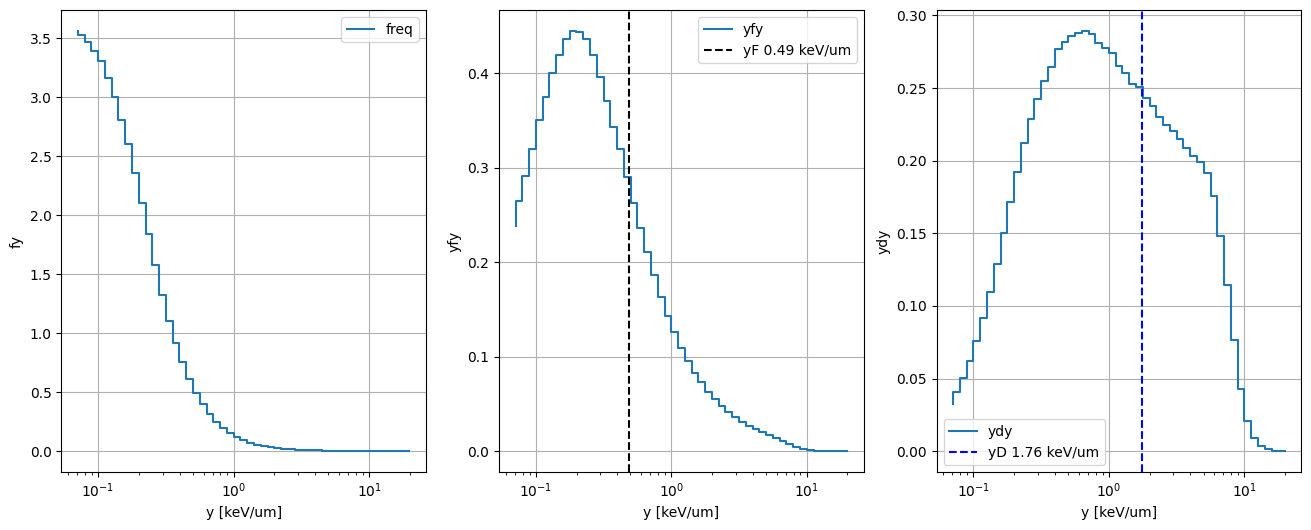

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
ax[0].step(
    spectrum_y_f1.data.bin_edges[1:],
    spectrum_y_f1.fy,
    label="freq",
)
ax[0].set_ylabel("fy")
ax[1].step(
    spectrum_y_f1.data.bin_edges[1:],
    spectrum_y_f1.yfy,
    label="yfy",
)
ax[1].axvline(
    spectrum_y_f1.yF,
    color="k",
    linestyle="--",
    label=f"yF {spectrum_y_f1.yF:2.2f} keV/um",
)
ax[1].set_ylabel("yfy")
ax[2].step(
    spectrum_y_f1.data.bin_edges[1:],
    spectrum_y_f1.ydy,
    label="ydy",
)
ax[2].axvline(
    spectrum_y_f1.yD,
    color="b",
    linestyle="--",
    label=f"yD {spectrum_y_f1.yD:2.2f} keV/um",
)
ax[2].set_ylabel("ydy")
for a in ax:
    a.set_xscale("log")
    a.grid()
    a.set_xlabel("y [keV/um]")
    a.legend()

## f1 z spectrum

In [6]:
site_diam_um = 1.0
spectrum_z_f1 = specific_energy_spectum(spectrum_y_f1, site_diam_um=site_diam_um)

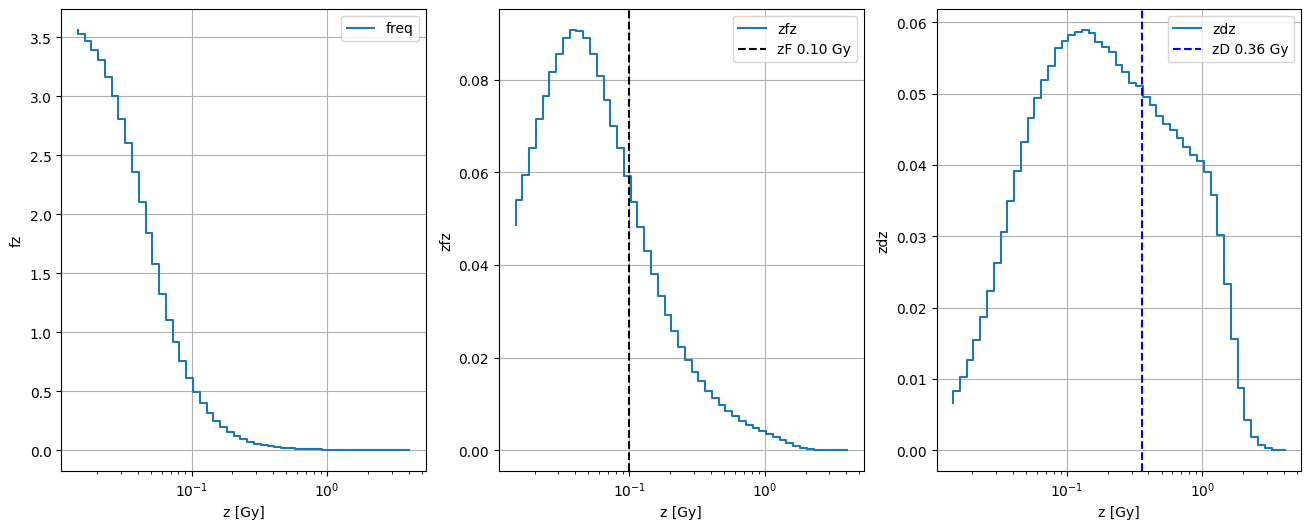

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
ax[0].step(
    spectrum_z_f1.data.bin_edges[1:],
    spectrum_z_f1.fz,
    label="freq",
)
ax[0].set_ylabel("fz")
ax[1].step(
    spectrum_z_f1.data.bin_edges[1:],
    spectrum_z_f1.zfz,
    label="zfz",
)
ax[1].axvline(
    spectrum_z_f1.zF,
    color="k",
    linestyle="--",
    label=f"zF {spectrum_z_f1.zF:2.2f} Gy",
)
ax[1].set_ylabel("zfz")
ax[2].step(
    spectrum_z_f1.data.bin_edges[1:],
    spectrum_z_f1.zdz,
    label="zdz",
)
ax[2].axvline(
    spectrum_z_f1.zD,
    color="b",
    linestyle="--",
    label=f"zD {spectrum_z_f1.zD:2.2f} Gy",
)
ax[2].set_ylabel("zdz")
for a in ax:
    a.set_xscale("log")
    a.grid()
    a.set_xlabel("z [Gy]")
    a.legend()

## CFDs

In [8]:
cfd(3, spectrum_y_f1.data, include_error=True)

NameError: name 'cfd' is not defined

In [ ]:
cfds(np.array([0.3, 0.5, 1.0, 2.0]), spectrum_y_f1.data, include_error=True)

In [ ]:
y_keV_um = np.geomspace(start=1e-1, stop=1e1, num=100)
integral_kwargs = {"limit": 2000}
# integral_kwargs = {}
cfds_y_fn_with_errors = cfds_with_progress(
    y_keV_um, spectrum_y_f1.data, include_error=True, kwargs=integral_kwargs
)

In [ ]:
fix, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
ax.errorbar(
    y_keV_um, cfds_y_fn_with_errors[:, 0], yerr=cfds_y_fn_with_errors[:, 1], fmt="."
)
ax.grid()
ax.set_xscale("log")
ax.set_xlabel("y [keV/um]")
ax.set_ylabel("CFD(y)")
ax.set_ylim(0.9, None)